Linear regression is a process of using historical data to determine a best fitting straight line between the data points and use it to forecast future values.

In [9]:
# Fundamental libraries for data science/analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline


In [35]:
# Setting the timeout variable to 1 second as we will need it later on. This dataset is rather large
import os
os.environ['PYDEVD_WARN_SLOW_RESOLVE_TIMEOUT'] = '1'


The data we are going to use oceanographic data from California. It is a popular dataset found on kaggle here - https://www.kaggle.com/datasets/sohier/calcofi and has a number of attributes which are defined in greater detail there.

In [4]:
# the data is in the datasets folder
datasets = '../datasets/'

# Read the data
df = pd.read_csv(datasets + 'bottle.csv')

df.head()

/var/folders/m6/zwh5tvjs2szd7l5xrt_rp8c00000gn/T/ipykernel_82783/2666855558.py:5: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datasets + 'bottle.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning and Preparation

We are going to reduce the data down to the 2 attributes required. Then clean the data, dealing with null values etc.

In [10]:
salinity_temp_df = df[['Salnty', 'T_degC']]

In [14]:
# basic statistics

salinity_temp_df.info()
salinity_temp_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Salnty  817509 non-null  float64
 1   T_degC  853900 non-null  float64
dtypes: float64(2)
memory usage: 13.2 MB


,Salnty,T_degC
count,817509.000000,853900.000000
mean,33.840350,10.799677
std,0.461843,4.243825
min,28.431000,1.440000
25%,33.488000,7.680000
50%,33.863000,10.060000
75%,34.196900,13.880000
max,37.034000,31.140000


In [16]:
# drop rows with missing values
salinity_temp_df = salinity_temp_df.dropna(axis=0, how='any')

# Check the data again to ensure we have a clean dataset
salinity_temp_df.info()
salinity_temp_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 814247 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Salnty  814247 non-null  float64
 1   T_degC  814247 non-null  float64
dtypes: float64(2)
memory usage: 18.6 MB


,Salnty,T_degC
count,814247.000000,814247.000000
mean,33.841337,10.860287
std,0.461636,4.224930
min,28.431000,1.440000
25%,33.489000,7.750000
50%,33.866000,10.110000
75%,34.197000,13.930000
max,37.034000,31.140000


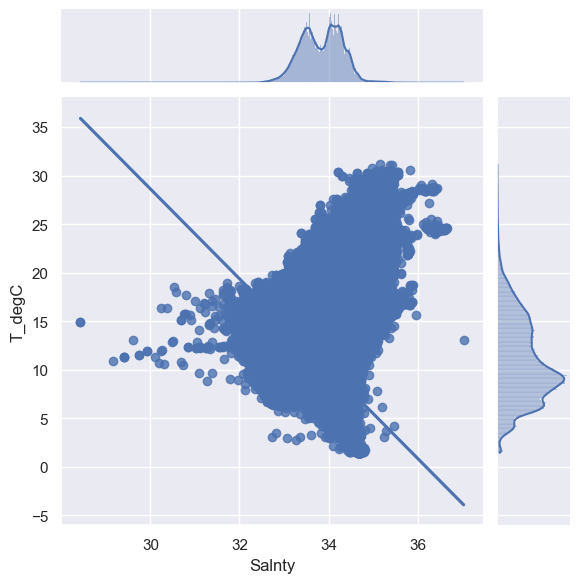

In [17]:
# Plot the data
sns.set(style="darkgrid")
sns.jointplot(x="Salnty", y="T_degC", data=salinity_temp_df, kind="reg")   
plt.show()

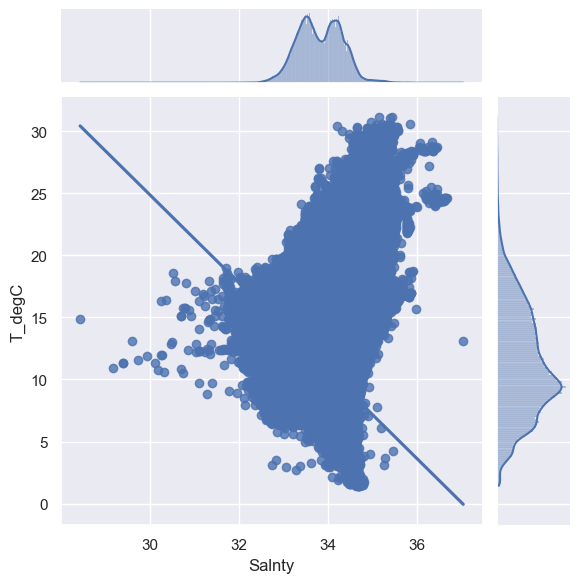

In [20]:
# plotting the data allows us to see the relationship between the two variables, though this is unclear as there seems to be a number of duplicate values

# We can drop duplicates to see if this improves the relationship
salinity_temp_df = salinity_temp_df.drop_duplicates(subset = ["Salnty", "T_degC"])

# Plot the data again
sns.jointplot(x="Salnty", y="T_degC", data=salinity_temp_df, kind="reg")
plt.show()

The result of dropping NA and deduping the data has allowed for more clear information and a complete dataset. Let's prepare the data for modelling now.

In [22]:
# turn the independent and dependent variables into numpy arrays
X = salinity_temp_df['Salnty'].values.reshape(-1,1)
y = salinity_temp_df['T_degC'].values.reshape(-1,1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# initialize the model
lr = LinearRegression()
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)

In [24]:
print("Test score: {0:.2f} %".format(100 * test_score))

Test score: 16.25 %


This is not a great score at all. Meaning that our data may not be suitable for linear regression in this case.

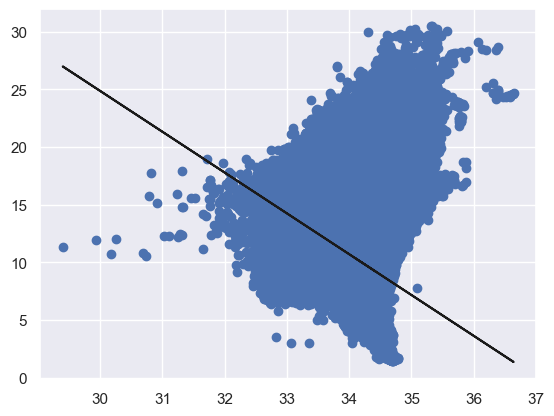

In [27]:
y_pred = lr.predict(X_test)

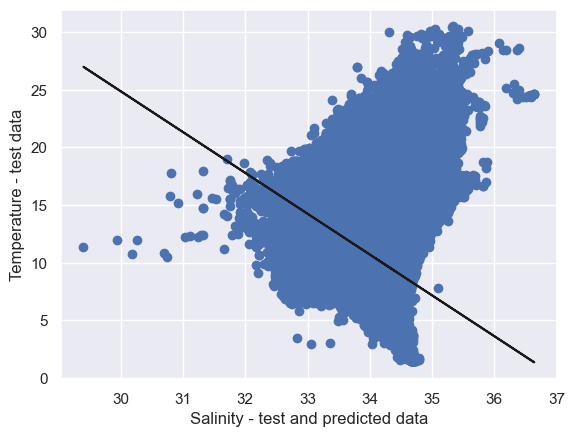

In [31]:
plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')

plt.xlabel("Salinity - test and predicted data")
plt.ylabel("Temperature - test data")
plt.show()

In [28]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

15.721990411928337
0.16248430404796166


As a thought exercise, let's look at the mean temperature for each value of salinity, and see if we could model that relationship.

In [32]:
# let's group the data by salinity and take the mean of the temperature
agg_salinity_temp_df = salinity_temp_df.groupby('Salnty').mean()

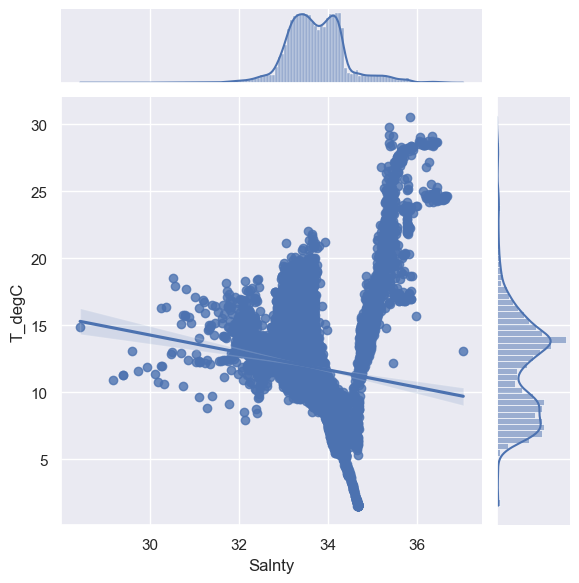

In [33]:
# plot the aggregated data with a regression line
sns.jointplot(x="Salnty", y="T_degC", data=agg_salinity_temp_df, kind="reg")
plt.show()

Having this result where a model will not work is common in data science. For linear regression, we could have performed some tests on the data first to assess the correlation of the data and the strength of the correlation which would have enabled us to see, possibly more quickly, that linear regression is not going to work.

We had a hypothesis that Salinity and Temperature had a relationship and Salinity could be used to predict/forecast the temperature of the water. Therefore H0 would be that temperature and salinity have no correlation.

We did a binomial regression with the data, however we should explore this dataset further, taking a look at trends over time etc. Maybe we can find a way to shape or slice the data which will allow for linear regression, binomial or polynomial.



In [5]:
# Clean the dataset by dropping NA values in the first 10 columns
df.dropna(axis=0, how='any', inplace=True, subset=df.columns[0:9])
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 661268 entries, 2160 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              661268 non-null  int64  
 1   Btl_Cnt              661268 non-null  int64  
 2   Sta_ID               661268 non-null  object 
 3   Depth_ID             661268 non-null  object 
 4   Depthm               661268 non-null  int64  
 5   T_degC               661268 non-null  float64
 6   Salnty               661268 non-null  float64
 7   O2ml_L               661268 non-null  float64
 8   STheta               661268 non-null  float64
 9   O2Sat                661268 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               114934 non-null  float64
 12  RecInd               661268 non-null  int64  
 13  T_prec               661268 non-null  float64
 14  T_qual               11701 non-null   float64
 15  S_prec             

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,661268.000000,661268.000000,661268.00000,661268.000000,661268.000000,661268.000000,661268.000000,661268.000000,661268.000000,114934.000000,...,220774.000000,220776.000000,661268.000000,117657.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,18377.130350,462713.841825,219.73400,10.917560,33.832800,3.416076,25.797882,57.103685,148.808694,10.309604,...,0.432847,0.190387,221.212279,162.185199,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10536.833323,256988.265284,311.15039,4.224529,0.460338,2.068615,1.009609,37.094023,90.187533,6.069612,...,1.159233,0.344355,314.548945,85.635622,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,71.000000,2161.000000,0.00000,1.440000,29.402000,-0.010000,20.996000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,1.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,9598.000000,250203.750000,49.00000,7.800000,33.480000,1.400000,24.941000,21.100000,60.915470,5.000000,...,0.050000,0.050000,49.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,19162.000000,478813.000000,125.00000,10.160000,33.854000,3.470000,25.972000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,28233.000000,695215.250000,300.00000,14.010000,34.184800,5.510000,26.634000,97.600000,240.379600,15.000000,...,0.380000,0.230000,302.000000,213.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.00000,31.140000,37.034000,11.130000,28.083000,214.100000,485.701800,24.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


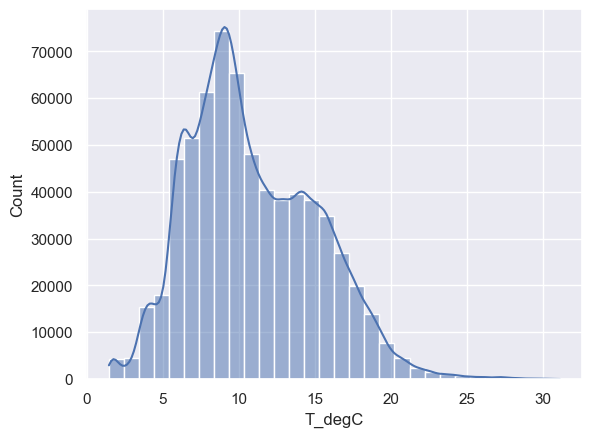

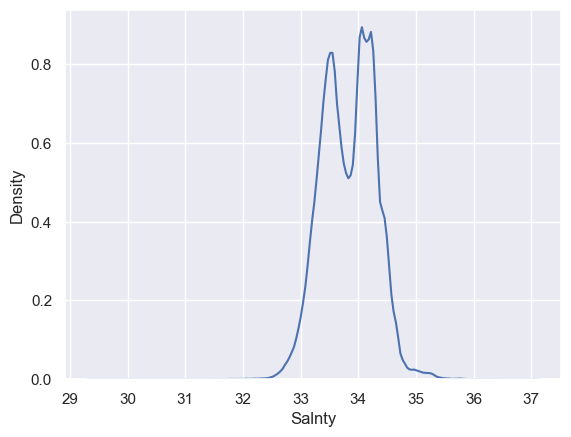

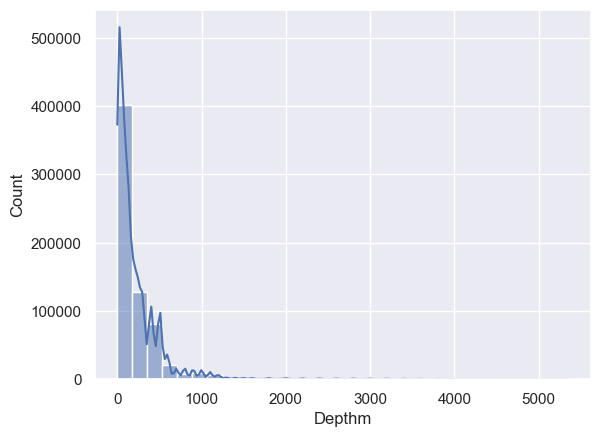

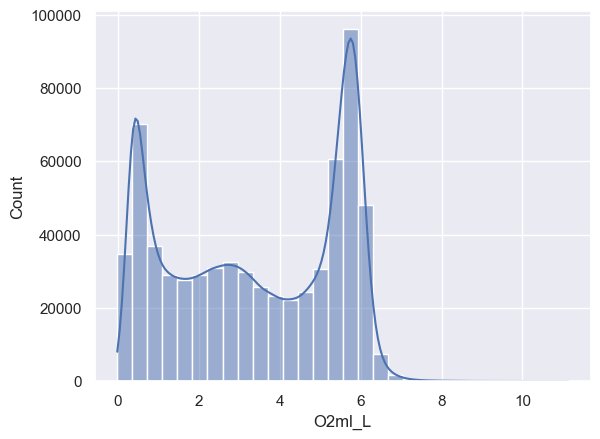

In [55]:
# KDE plots are useful when we do not really know the underlying distribution of the data
# We are going back to the original data and will plot salinity, temperature, depth, and 02 ration

sns.histplot(data=df, x="T_degC", bins=30, kde=True)
plt.show()

sns.kdeplot(data=df, x="Salnty")
plt.show()

sns.histplot(data=df, x="Depthm", bins=30, kde=True)
plt.show()

sns.histplot(data=df, x="O2ml_L", bins=30, kde=True)
plt.show()

let's assume the data was collected over time and use the index as collection points. this will allow us to plot the data as a time series.

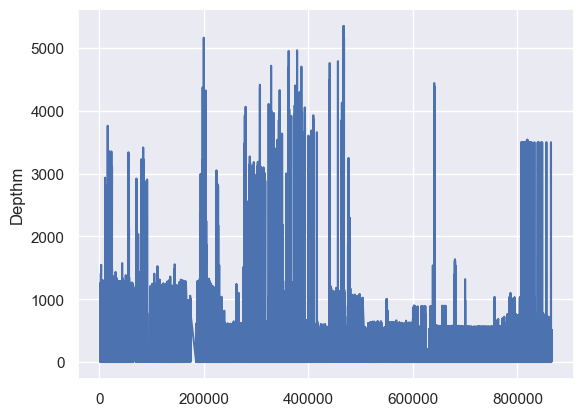

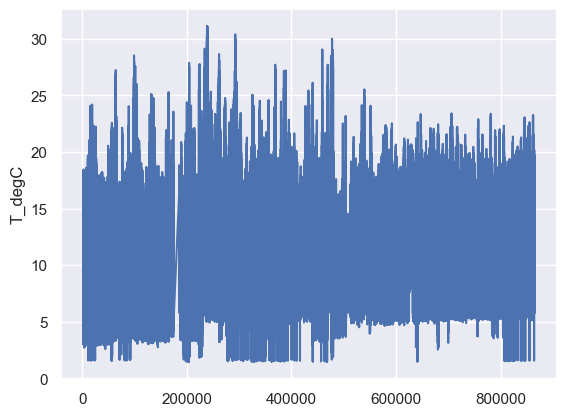

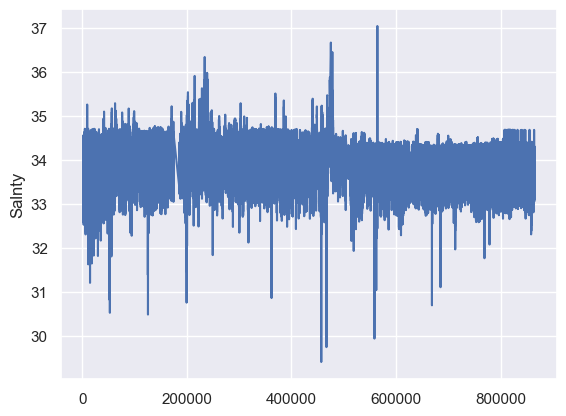

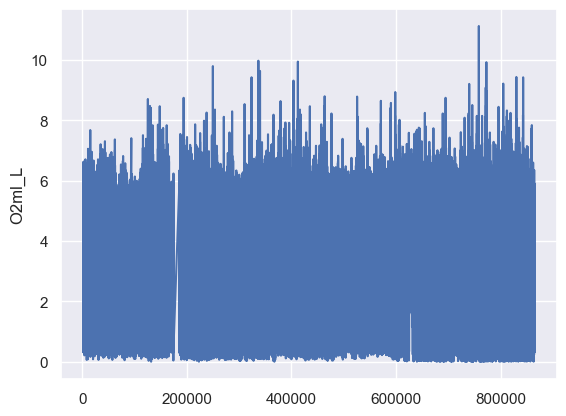

In [56]:
# Let's look at these values over time
sns.lineplot(data=df, x=df.index, y="Depthm", errorbar=None)
plt.show()

sns.lineplot(data=df, x=df.index, y="T_degC", errorbar=None)
plt.show()

sns.lineplot(data=df, x=df.index, y="Salnty", errorbar=None)
plt.show()

sns.lineplot(data=df, x=df.index, y="O2ml_L", errorbar=None)
plt.show()

In [48]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment,year
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [65]:
# let's look at the correlation between the variables - selecting only numeric columns
corr = df[df.columns[0:9].difference(['Sta_ID', 'Depth_ID', 'DIC Salt contamination suspected'])].corr()
corr.style.background_gradient(cmap='coolwarm')


,Btl_Cnt,Cst_Cnt,Depthm,O2ml_L,STheta,Salnty,T_degC
Btl_Cnt,1.000000,0.999343,-0.168053,0.145485,-0.118580,-0.221846,0.076961
Cst_Cnt,0.999343,1.000000,-0.169257,0.147482,-0.119641,-0.225446,0.076716
Depthm,-0.168053,-0.169257,1.000000,-0.589101,0.664678,0.563936,-0.665744
O2ml_L,0.145485,0.147482,-0.589101,1.000000,-0.889568,-0.824384,0.795007
STheta,-0.118580,-0.119641,0.664678,-0.889568,1.000000,0.701585,-0.964140
Salnty,-0.221846,-0.225446,0.563936,-0.824384,0.701585,1.000000,-0.505686
T_degC,0.076961,0.076716,-0.665744,0.795007,-0.964140,-0.505686,1.000000


From the correlation matrix above we can see that the first 2 fields are inconsequential for predicting temperature, while the remaining fields, Depthm, O2ml_L, STheta, and Salnty have medium to strong correlation with Temperature.

We know a binomial linear regression does not work, but let's try a multivariate approach.

Using our selected fields, we are going to go through the process again of splitting the data into train and test data, then view the coefficients and intercept value that would provide the formula by training the model on our training data.
Following that, we will test the model on the test data and measure the accuracy of our model.

In [6]:
# Select the columns we want to use for the model
multivariate_df = df[df.columns[0:9].difference(['Sta_ID', 'Depth_ID', 'DIC Salt contamination suspected'])]

# Check the data
multivariate_df.info()

# set the independent and dependent variables and convert them to numpy arrays
X = multivariate_df.drop('T_degC', axis=1).values
y = multivariate_df['T_degC'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Index: 661268 entries, 2160 to 864862
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Btl_Cnt  661268 non-null  int64  
 1   Cst_Cnt  661268 non-null  int64  
 2   Depthm   661268 non-null  int64  
 3   O2ml_L   661268 non-null  float64
 4   STheta   661268 non-null  float64
 5   Salnty   661268 non-null  float64
 6   T_degC   661268 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 40.4 MB


In [7]:
# We are introducing a scaler here to ensure that the data is scaled before it is fed into the model
# define the pipeline
steps = [('scaler', StandardScaler()), ('LinearRegression', LinearRegression())]

# initialize the pipeline
pipeline = Pipeline(steps)

# fit the pipeline to the training data
pipeline.fit(X_train, y_train)

#View the coefficients and intercept
print(pipeline.named_steps['LinearRegression'].coef_)
print(pipeline.named_steps['LinearRegression'].intercept_)

[ 0.97717644 -0.96425827 -0.4728917   0.30187414 -4.63210698  1.6284824 ]
10.914373378386646


In [8]:
# predict the test data
y_pred = pipeline.predict(X_test)

# calculate the r2 score
test_score = r2_score(y_test, y_pred)
print("Test score: {0:.2f} %".format(100 * test_score))

Test score: 99.39 %


We can evaluate a linear model using the below metrics. The main metric for linear regression is R-Squared. We used R-qaured to show that the binomial model for predicting temperature was not effective, and a binomial linear model predicting temperature using salinity was not a viable model.

- Mean squared error (MSE): This metric measures the average squared difference between the predicted values and the actual values. A lower MSE indicates better performance.

- R-squared score: This metric measures the proportion of variance in the target variable that is explained by the predictor variables. A higher R-squared score indicates better performance.

- Root mean squared error (RMSE): This metric is the square root of the mean squared error, and has the same units as the target variable. A lower RMSE indicates better performance.

- Mean absolute error (MAE): This metric measures the average absolute difference between the predicted values and the actual values. A lower MAE indicates better performance.

MSE: 0.109
RMSE: 0.331
R-squared: 0.994
MAE: 0.216


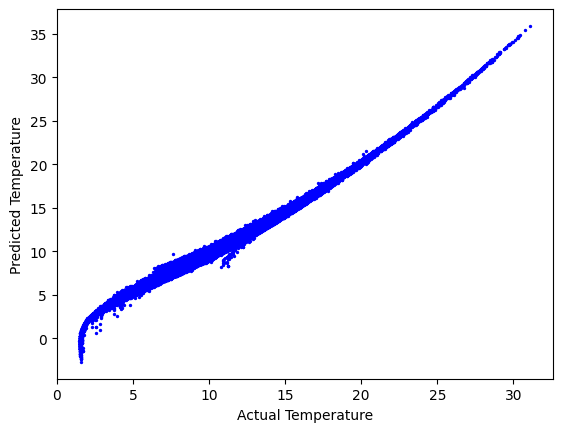

In [11]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))
print("R-squared: {:.3f}".format(r2))
print("MAE: {:.3f}".format(mae))

# Plot the predicted values against the actual values showing the relationship between the two
plt.scatter(y_test, y_pred, color ='b', s=2)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.show()


Here we can see our model is very accurate now, possibly to the point of overfitting or underfitting. In order to test for overfitting or underfitting we need to compare the metrics for the training predictions and the test predictions. If there is a large difference to the metrics between our train and test set, then we may be over fitting the model. If the results of R2 and is not close to 1 and MSE, MAE and RMSE are not low then it would indicate underfitting.

In [12]:
# predict the training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# calculater the metrics for the training and test data
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae = mean_absolute_error(y_train, y_train_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Train MSE: {:.3f}".format(train_mse))
print("Train RMSE: {:.3f}".format(train_rmse))
print("Train R-squared: {:.3f}".format(train_score))
print("Train MAE: {:.3f}".format(train_mae))
print("Test MSE: {:.3f}".format(mse))
print("Test RMSE: {:.3f}".format(rmse))
print("Test R-squared: {:.3f}".format(r2))
print("Test MAE: {:.3f}".format(mae))


Train MSE: 0.109
Train RMSE: 0.331
Train R-squared: 0.994
Train MAE: 0.215
Test MSE: 0.109
Test RMSE: 0.331
Test R-squared: 0.994
Test MAE: 0.216


In [21]:
# print the coefficients and intercept in the form of an equation with column names for the independent variables
print("""y = {:.3f} + {:.3f} (Salnty) + {:.3f} (O2ml_L) + {:.3f} (Depthm) + {:.3f} (STheta) + {:.3f} (O2Sat) + {:.3f} (RecInd)
      """.format(pipeline.named_steps['LinearRegression'].intercept_, 
                              pipeline.named_steps['LinearRegression'].coef_[0], 
                              pipeline.named_steps['LinearRegression'].coef_[1], 
                              pipeline.named_steps['LinearRegression'].coef_[2],
                              pipeline.named_steps['LinearRegression'].coef_[3],
                              pipeline.named_steps['LinearRegression'].coef_[4],
                              pipeline.named_steps['LinearRegression'].coef_[5]
                             ))


y = 10.914 + 0.977 (Salnty) + -0.964 (O2ml_L) + -0.473 (Depthm) + 0.302 (STheta) + -4.632 (O2Sat) + 1.628 (RecInd)
      


We can see that they are exactly the same. according to the results we have a reliable model which can be used to predict temperature. The metrics indicate that the model captures the complexity of the data and the relationships between the attributes and our dependent variable.

Our model can be written as the following:

y = 10.914 + 0.977 (Salnty) + -0.964 (O2ml_L) + -0.473 (Depthm) + 0.302 (STheta) + -4.632 (O2Sat) + 1.628 (RecInd)